# **TUBES MACHINE LEARNING**
Contributor
 * **ICHLASUL AMAL**
 * **RIZKYTA SHAINY ANGELINE** 
 
 ***
 
 **Formulasi Masalah:** Melakukan pemodelan untuk prediksi label dari data

## Preparation

In [3]:
# Import All Package
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Show Info
print('Info All Package version!')
print('Pandas Version : {}'.format(pd.__version__))
print('Numpy Version : {}'.format(np.__version__))
print('Seaborn Version : {}'.format(sns.__version__))

Info All Package version!
Pandas Version : 0.25.1
Numpy Version : 1.16.5
Seaborn Version : 0.9.0


In [4]:
#Check Dataset
print('Datasets :')
datasetSalju = False
datasets = os.listdir('../datasets/')
for dataset in datasets:
    if dataset[-3:] == 'csv':
        if dataset[:5] == 'salju':
            datasetSalju = True
        print('\t',x)
if datasetSalju :
    print('\nDataset Salju Available')
else :
    print('Dataset Salju Not Available')

Datasets :


NameError: name 'x' is not defined

## Start to code!

In [38]:
#Read Dataset
data_train_salju = pd.read_csv('../datasets/salju_train.csv')
data_test_salju = pd.read_csv('../datasets/salju_test.csv')
print("Jumlah data train salju : {}".format(data_train_salju.shape))
print("Jumlah data test salju : {}".format(data_test_salju.shape))

Jumlah data train salju : (109095, 24)
Jumlah data test salju : (18182, 23)


### Data Exploration & Preparation

In [39]:
data_train_salju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
id                          109095 non-null int64
Tanggal                     109095 non-null object
KodeLokasi                  109095 non-null object
SuhuMin                     107973 non-null float64
SuhuMax                     108166 non-null float64
Hujan                       106664 non-null float64
Penguapan                   62071 non-null float64
SinarMatahari               56716 non-null float64
ArahAnginTerkencang         101351 non-null object
KecepatanAnginTerkencang    101399 non-null float64
ArahAngin9am                101172 non-null object
ArahAngin3pm                105898 non-null object
KecepatanAngin9am           107742 non-null float64
KecepatanAngin3pm           106792 non-null float64
Kelembaban9am               107093 non-null float64
Kelembaban3pm               105721 non-null float64
Tekanan9am                  97768 non-null float64
Tekanan3pm     

In [40]:
data_train_salju.describe(include='all')

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
count,109095.000000,109095,109095,107973.000000,108166.000000,106664.000000,62071.000000,56716.000000,101351,101399.000000,...,107093.000000,105721.000000,97768.000000,97787.000000,67251.000000,64624.000000,107755.000000,106397.000000,106664,106664
unique,NaN,3414,49,NaN,NaN,NaN,NaN,NaN,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,05/12/2013,C1,NaN,NaN,NaN,NaN,NaN,W,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tidak,Tidak
freq,NaN,45,2598,NaN,NaN,NaN,NaN,NaN,7491,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82670,82701
mean,54548.000000,NaN,NaN,12.196183,23.214819,2.385005,5.462440,7.599527,NaN,40.032002,...,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771,NaN,NaN
std,31493.158146,NaN,NaN,6.389419,7.106596,8.588155,4.201638,3.789042,NaN,13.617554,...,18.995528,20.791573,7.117338,7.047875,2.884566,2.718738,6.477602,6.922833,NaN,NaN
min,1.000000,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,7.000000,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,NaN
25%,27274.500000,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,...,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,NaN
50%,54548.000000,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,...,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,NaN
75%,81821.500000,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,...,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,NaN


In [41]:
# Encode data pada BersaljuBesok dan BersaljuHariIni
data_train_salju['BersaljuBesok'] = (data_train_salju['BersaljuBesok'] == 'Ya').astype(int)
data_train_salju['BersaljuHariIni'] = (data_train_salju['BersaljuHariIni'] == 'Ya').astype(int)
data_train_salju.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,1,0
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,1,1
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,0,0
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0


In [42]:
# Cek persentase missing values pada setiap kolom
missing_percentage = (data_train_salju.isnull().sum() / data_train_salju.isnull().count()).sort_values()
missing_percentage

id                          0.000000
BersaljuHariIni             0.000000
BersaljuBesok               0.000000
KodeLokasi                  0.000000
Tanggal                     0.000000
SuhuMax                     0.008516
SuhuMin                     0.010285
Suhu9am                     0.012283
KecepatanAngin9am           0.012402
Kelembaban9am               0.018351
KecepatanAngin3pm           0.021110
Hujan                       0.022283
Suhu3pm                     0.024731
ArahAngin3pm                0.029305
Kelembaban3pm               0.030927
KecepatanAnginTerkencang    0.070544
ArahAnginTerkencang         0.070984
ArahAngin9am                0.072625
Tekanan3pm                  0.103653
Tekanan9am                  0.103827
Awan9am                     0.383556
Awan3pm                     0.407636
Penguapan                   0.431037
SinarMatahari               0.480123
dtype: float64

In [43]:
# Mengecek korelasi antara kolom BersaljuBesok dengan kolom lainnya
bersalju_corr = abs(data_train_salju.corr()['BersaljuBesok']).sort_values()
bersalju_corr

id                          0.002692
Suhu9am                     0.026721
SuhuMin                     0.081813
KecepatanAngin3pm           0.088008
KecepatanAngin9am           0.088646
Penguapan                   0.118658
SuhuMax                     0.158822
Suhu3pm                     0.192587
Tekanan3pm                  0.222901
KecepatanAnginTerkencang    0.230203
Hujan                       0.236878
Tekanan9am                  0.242786
Kelembaban9am               0.253510
BersaljuHariIni             0.307602
Awan9am                     0.316292
Awan3pm                     0.376409
Kelembaban3pm               0.441152
SinarMatahari               0.444537
BersaljuBesok               1.000000
Name: BersaljuBesok, dtype: float64

In [44]:
# Drop feature yang presentase missing values > 30%???

In [45]:
# Menghapus kolom yang tidak akan digunakan dalam pemodelan
data_train_salju.drop(['id', 'Tanggal', 'KodeLokasi','ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm'], axis=1, inplace=True)
data_train_salju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 18 columns):
SuhuMin                     107973 non-null float64
SuhuMax                     108166 non-null float64
Hujan                       106664 non-null float64
Penguapan                   62071 non-null float64
SinarMatahari               56716 non-null float64
KecepatanAnginTerkencang    101399 non-null float64
KecepatanAngin9am           107742 non-null float64
KecepatanAngin3pm           106792 non-null float64
Kelembaban9am               107093 non-null float64
Kelembaban3pm               105721 non-null float64
Tekanan9am                  97768 non-null float64
Tekanan3pm                  97787 non-null float64
Awan9am                     67251 non-null float64
Awan3pm                     64624 non-null float64
Suhu9am                     107755 non-null float64
Suhu3pm                     106397 non-null float64
BersaljuHariIni             109095 non-null int32
BersaljuBesok

In [47]:
# Handling missing values dengan memberi nilai median dan rata-rata pada baris yang memiliki nilai null
data_train_salju['SuhuMin'].fillna(data_train_salju['SuhuMin'].mean(), inplace=True)
data_train_salju['SuhuMax'].fillna(data_train_salju['SuhuMax'].mean(), inplace=True)
data_train_salju['Hujan'].fillna(data_train_salju['Hujan'].mean(), inplace=True)
data_train_salju['Penguapan'].fillna(data_train_salju['Penguapan'].mean(), inplace=True)
data_train_salju['SinarMatahari'].fillna(data_train_salju['SinarMatahari'].mean(), inplace=True)
data_train_salju['KecepatanAnginTerkencang'].fillna(data_train_salju['KecepatanAnginTerkencang'].mean(), inplace=True)
data_train_salju['KecepatanAngin9am'].fillna(data_train_salju['KecepatanAngin9am'].mean(), inplace=True)
data_train_salju['KecepatanAngin3pm'].fillna(data_train_salju['KecepatanAngin3pm'].mean(), inplace=True)
data_train_salju['Kelembaban9am'].fillna(data_train_salju['Kelembaban9am'].median(), inplace=True)
data_train_salju['Kelembaban3pm'].fillna(data_train_salju['Kelembaban3pm'].median(), inplace=True)
data_train_salju['Tekanan9am'].fillna(data_train_salju['Tekanan9am'].mean(), inplace=True)
data_train_salju['Tekanan3pm'].fillna(data_train_salju['Tekanan3pm'].mean(), inplace=True)
data_train_salju['Awan9am'].fillna(data_train_salju['Awan9am'].median(), inplace=True)
data_train_salju['Awan3pm'].fillna(data_train_salju['Awan3pm'].median(), inplace=True)
data_train_salju['Suhu9am'].fillna(data_train_salju['Suhu9am'].mean(), inplace=True)
data_train_salju['Suhu3pm'].fillna(data_train_salju['Suhu3pm'].mean(), inplace=True)
data_train_salju.isnull().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
KecepatanAnginTerkencang    0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

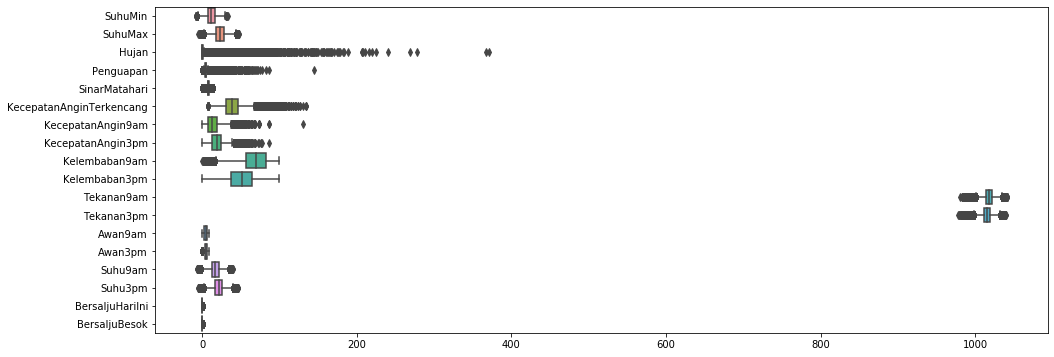

In [48]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=data_train_salju, orient='h')

In [ ]:
# Handle Outlier


In [49]:
#data_train_salju = pd.get_dummies(data=data_train_salju,columns=['ArahAnginTerkencang','ArahAngin9am', 'ArahAngin3pm'])
#data_train_salju.head(3)

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax_train = scaler.fit_transform(data_train_salju)
minmax_train

array([[0.44575472, 0.38963532, 0.01293801, ..., 0.3915547 , 1.        ,
        0.        ],
       [0.41273585, 0.4184261 , 0.02156334, ..., 0.40115163, 1.        ,
        1.        ],
       [0.62971698, 0.70633397, 0.        , ..., 0.67178503, 0.        ,
        0.        ],
       ...,
       [0.37735849, 0.48368522, 0.00431267, ..., 0.48368522, 1.        ,
        0.        ],
       [0.45518868, 0.66410749, 0.        , ..., 0.66410749, 0.        ,
        0.        ],
       [0.49056604, 0.61804223, 0.02425876, ..., 0.55086372, 1.        ,
        0.        ]])

In [50]:
data_test_salju.isnull().sum()

Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64

### Permodelan

In [ ]:
X_train = minmax_train[:]
X_test = minmax_train[-1]
y_train = 
y_test = 

In [ ]:
#from sklearn. import


### Evaluation 

In [ ]:
#from sklearn import metrics

### Experimen 

### Conclusion